In [1]:
import bayes3d as b
import bayes3d.genjax
import genjax
import jax.numpy as jnp
import jax
import os
from tqdm import tqdm
console = genjax.pretty(show_locals=False)


In [2]:
b.setup_visualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7003/static/


In [3]:
intrinsics = b.Intrinsics(
    height=100,
    width=100,
    fx=500.0, fy=500.0,
    cx=50.0, cy=50.0,
    near=0.01, far=20.0
)

b.setup_renderer(intrinsics)
model_dir = os.path.join(b.utils.get_assets_dir(),"bop/ycbv/models")
meshes = []
for idx in range(1,22):
    mesh_path = os.path.join(model_dir,"obj_" + "{}".format(idx).rjust(6, '0') + ".ply")
    b.RENDERER.add_mesh_from_file(mesh_path, scaling_factor=1.0/1000.0)

# b.RENDERER.add_mesh_from_file(os.path.join(b.utils.get_assets_dir(), "sample_objs/cube.obj"), scaling_factor=1.0/1000000000.0)

[E rasterize_gl.cpp:121] OpenGL version reported as 4.6


Increasing frame buffer size to (width, height, depth) = (128, 128, 1024)


In [4]:
# del importance_jit
importance_jit = jax.jit(b.genjax.model.importance)
key = jax.random.PRNGKey(5)

[5]
-29716.465


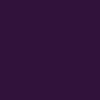

In [5]:
key, (_,gt_trace) = importance_jit(key, genjax.choice_map({
    "parent_0": -1,
    "parent_1": 0,
    "parent_2": 0,
    "parent_3": 0,
    # "id_0": jnp.int32(21),
    "camera_pose": jnp.eye(4),
}), (jnp.arange(1), jnp.arange(21), 
     (jnp.array([-0.2, -0.2, -0.05]), jnp.array([0.2, 0.2, 2.0])), 
     (jnp.array([-0.2, -0.2, -jnp.pi]),jnp.array([0.2, 0.2, jnp.pi])), b.RENDERER.model_box_dims, 100.0))
print(b.genjax.get_indices(gt_trace))
print(gt_trace.get_score())
b.genjax.viz_trace_meshcat(gt_trace)

# choices = gt_trace.get_choices()
# key, (_,trace) = importance_jit(key, choices, (jnp.arange(1), jnp.arange(21), *gt_trace.get_args()[2:]))
# # b.genjax.viz_trace_meshcat(trace)

b.get_depth_image(gt_trace["image"][...,2])